In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing # keras.datasets 안에 boston_housing 데이터셋을 로드합니다.

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print('훈련 데이터 크기: {}'.format(len(train_data)))
print('테스트 데이터 크기: {}'.format(len(test_data)))


훈련 데이터 크기: 404
테스트 데이터 크기: 102


In [4]:
import numpy as np
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data_mean = np.mean(train_data, axis=0)
train_data_std = np.std(train_data, axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data -= train_data_mean
train_data /= train_data_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= train_data_mean
test_data /= train_data_std

# 데이터셋의 크기를 확인합니다.
print('훈련 데이터 크기: {}'.format(len(train_data)))
print('테스트 데이터 크기: {}'.format(len(test_data)))

훈련 데이터 크기: 404
테스트 데이터 크기: 102


In [5]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

model = build_model()
history = model.fit(train_data, train_labels, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
23/23 [==============================] - 1s 8ms/step - loss: 543.1982 - mae: 21.1694 - val_loss: 409.6610 - val_mae: 18.8774
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 424.5165 - mae: 18.1419 - val_loss: 278.9727 - val_mae: 15.1739
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 252.6526 - mae: 13.4275 - val_loss: 119.1694 - val_mae: 9.5553
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 105.2399 - mae: 8.0688 - val_loss: 49.4817 - val_mae: 5.9310
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 58.2044 - mae: 5.8669 - val_loss: 31.4380 - val_mae: 4.6142
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 38.6196 - mae: 4.6553 - val_loss: 24.6296 - val_mae: 4.1718
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 28.5412 - mae: 3.8683 - val_loss: 20.2130 - val_mae: 3.7283
Epoch 8/20
23/23 [==============================] - 0s 2ms/step 

<ipython-input-6-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


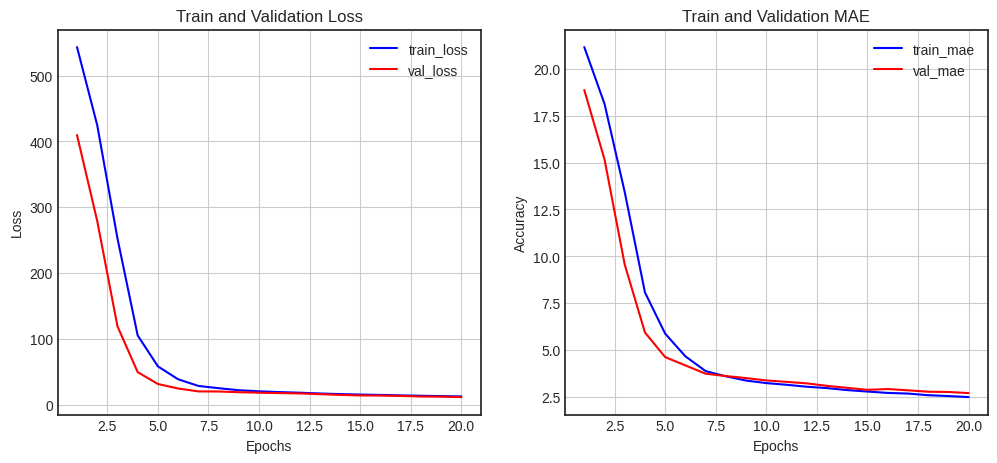

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(f'Test MAE: {test_mae_score}')

4/4 [==============================] - 0s 4ms/step - loss: 24.4524 - mae: 3.4916
Test MAE: 3.491647720336914
